# introduction :
The dataset I've chosen for examination is the 'Mroz' data frame from the Panel Study of Income Dynamics (PSID), sourced from R's dataset collection. This dataset contains observations of married women in the U.S., focusing on their labor-force participation and its influencing factors. Each entry in this dataset is associated with a specific married woman, highlighting details about her and her family's demographic and economic conditions. It comprises eight attributes: lfp, k5, k618, age, wc, hc, lwg, and inc.

the core research question we are going to analyze is How do factors such as the number of children, age, educational background of both the wife and husband, and family income (excluding the wife's income) influence the labor-force participation of married women in the U.S.

In [1]:
import pandas as pd #import

import numpy as np


# Define the URL where the dataset
url = "https://raw.githubusercontent.com/Francesgaba/DATA5400/main/Mroz.csv"

# load the data from github
df = pd.read_csv(url, sep = ",")

# Display the first few rows of the dataset
df.head()


,rownames,lfp,k5,k618,age,wc,hc,lwg,inc
0,1,yes,1,0,32,no,no,1.210165,10.910001
1,2,yes,0,2,30,no,no,0.328504,19.500000
2,3,yes,1,3,35,no,no,1.514128,12.039999
3,4,yes,0,3,34,no,no,0.092115,6.800000
4,5,yes,1,2,31,yes,no,1.524280,20.100000


since there are there catogrical features, so we are going to encode it from yes/no to the 1/0

In [2]:
df['lfp_encoded'] = df['lfp'].map({'yes': 1, 'no': 0})
df['wc_encoded'] = df['wc'].map({'yes': 1, 'no': 0})
df['hc_encoded'] = df['hc'].map({'yes': 1, 'no': 0})  # encoding the catoigrical variable
df.head()

,rownames,lfp,k5,k618,age,wc,hc,lwg,inc,lfp_encoded,wc_encoded,hc_encoded
0,1,yes,1,0,32,no,no,1.210165,10.910001,1,0,0
1,2,yes,0,2,30,no,no,0.328504,19.500000,1,0,0
2,3,yes,1,3,35,no,no,1.514128,12.039999,1,0,0
3,4,yes,0,3,34,no,no,0.092115,6.800000,1,0,0
4,5,yes,1,2,31,yes,no,1.524280,20.100000,1,1,0


then let's check the data summary 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     753 non-null    int64  
 1   lfp          753 non-null    object 
 2   k5           753 non-null    int64  
 3   k618         753 non-null    int64  
 4   age          753 non-null    int64  
 5   wc           753 non-null    object 
 6   hc           753 non-null    object 
 7   lwg          753 non-null    float64
 8   inc          753 non-null    float64
 9   lfp_encoded  753 non-null    int64  
 10  wc_encoded   753 non-null    int64  
 11  hc_encoded   753 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 70.7+ KB


there are 753 rows intotal,two continuous variable: lwg, inc, three discrete variable: k5,k618,age and three catogrical variable : k5,k618,age,the original dataset have datatype float and integer and object,after encoing the catogrical coloumns,now they are integer

since there is no missing value,let move on to the data description

In [4]:
df.describe()

,rownames,k5,k618,age,lwg,inc,lfp_encoded,wc_encoded,hc_encoded
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,377.000000,0.237716,1.353254,42.537849,1.097115,20.128965,0.568393,0.281541,0.391766
std,217.516666,0.523959,1.319874,8.072574,0.587556,11.634799,0.495630,0.450049,0.488469
min,1.000000,0.000000,0.000000,30.000000,-2.054124,-0.029000,0.000000,0.000000,0.000000
25%,189.000000,0.000000,0.000000,36.000000,0.818087,13.025000,0.000000,0.000000,0.000000
50%,377.000000,0.000000,1.000000,43.000000,1.068403,17.700001,1.000000,0.000000,0.000000
75%,565.000000,0.000000,2.000000,49.000000,1.399717,24.466000,1.000000,1.000000,1.000000
max,753.000000,3.000000,8.000000,60.000000,3.218876,96.000000,1.000000,1.000000,1.000000


### K5:
The average of children under 5 (k5) is 0.24, suggesting most women in the dataset have less than one child under 5 years old
75% of the data has 0 children under 5, with a maximum of 3. This means there are very few women with more than 2 children under 5.
### k618:
The average number of children between 6 to 18 is 1.35. Half the women have 1 child in this age range, and 75% have up to 2, with a maximum of 8.
### age:
The women in this dataset range in age from 30 to 60 years, with an average age of approximately 42.54 years.Half the women are aged 43 or younger.
### lwg:
Ranges from -2.05 to 3.22 with an average log wage of approximately 1.
### inc
The family income with an average of about 20.13 The 50% mark at 17.7 , which indicate half of the data is below this value

# EDA

for continuous variable we plot them as histograms 

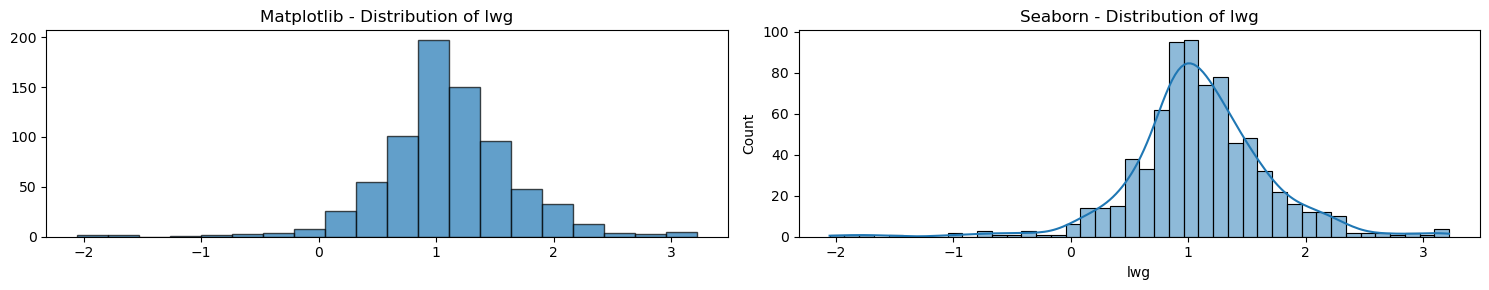

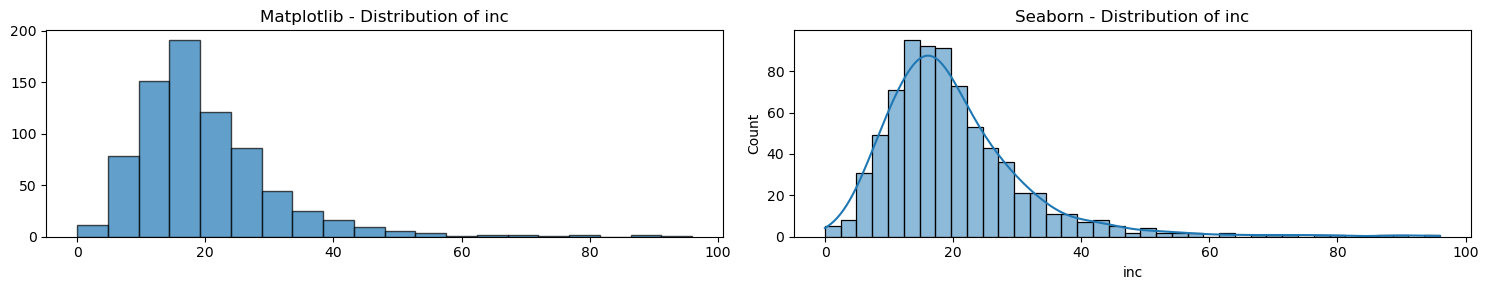

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_variable = ["lwg", "inc"]

for col in continuous_variable:
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3)) # set a side-by-side viuslization for each variable

    axes[0].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Matplotlib - Distribution of {col}')  # Matplotlib histogram 
    
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Seaborn - Distribution of {col}')  # seaborn histogram 

    plt.tight_layout()
    plt.show()


base on shape of distribution,lwg is approximately suggesting normal distribution and sligtlt right-skewed.that is showing the majority of the women in this dataset have a log expected wage rate between 0 and 2, with the most common value around 1.
inc distribution is a left-skewed shape,that is indicate the majority of woman in this dataset get paid btw rang 0-96,most them are around 20 .

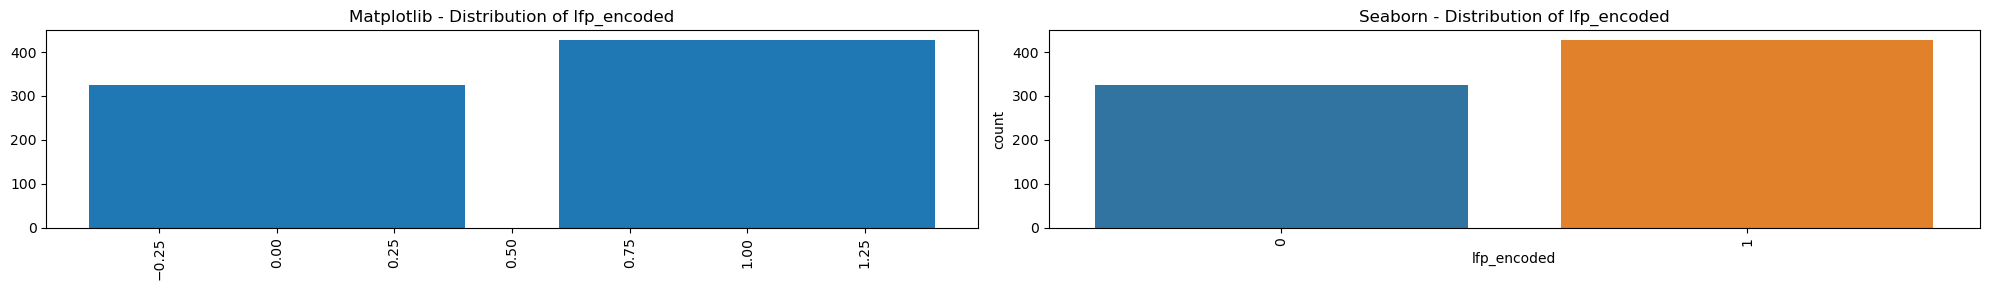

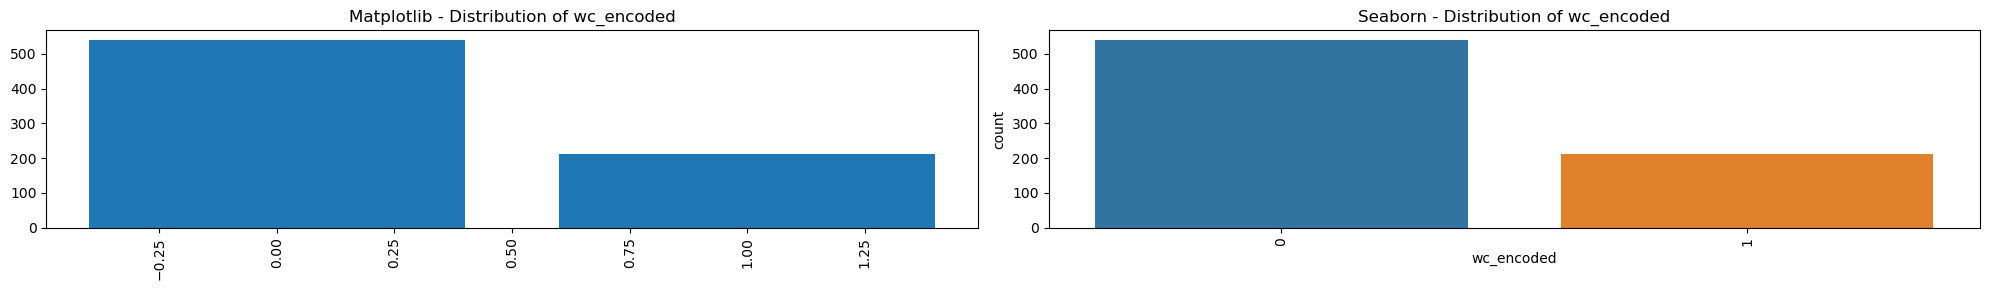

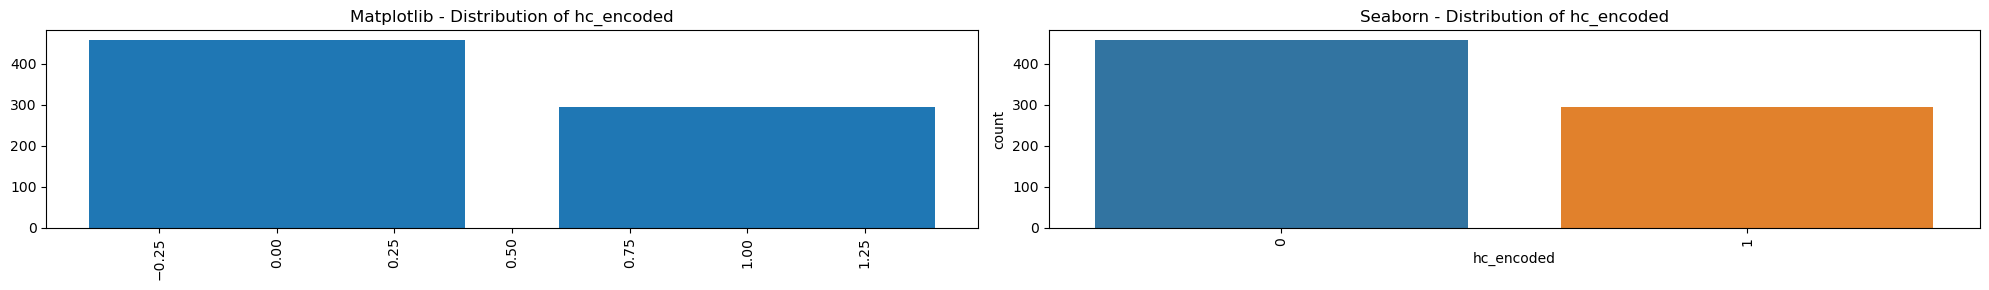

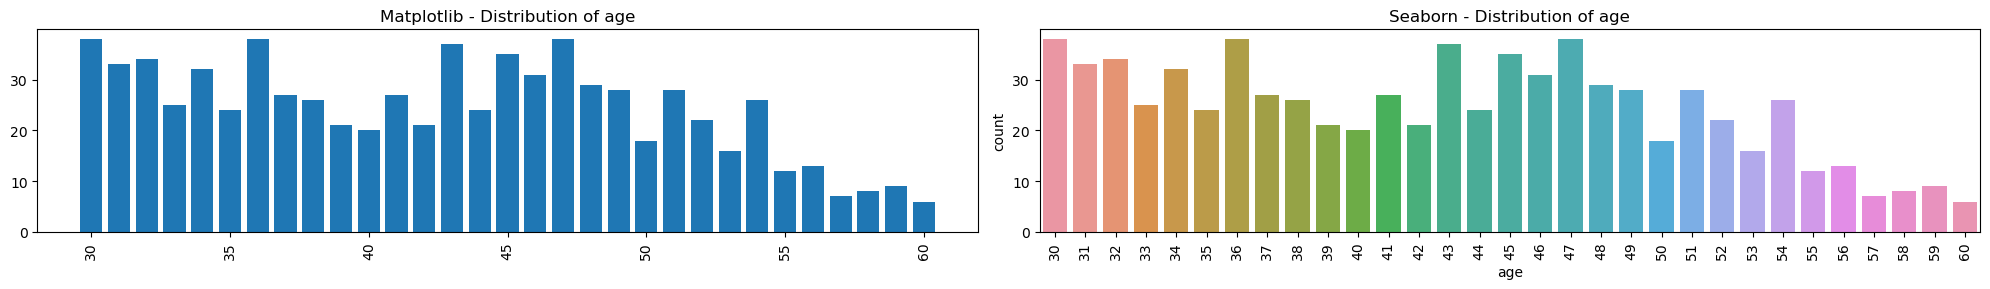

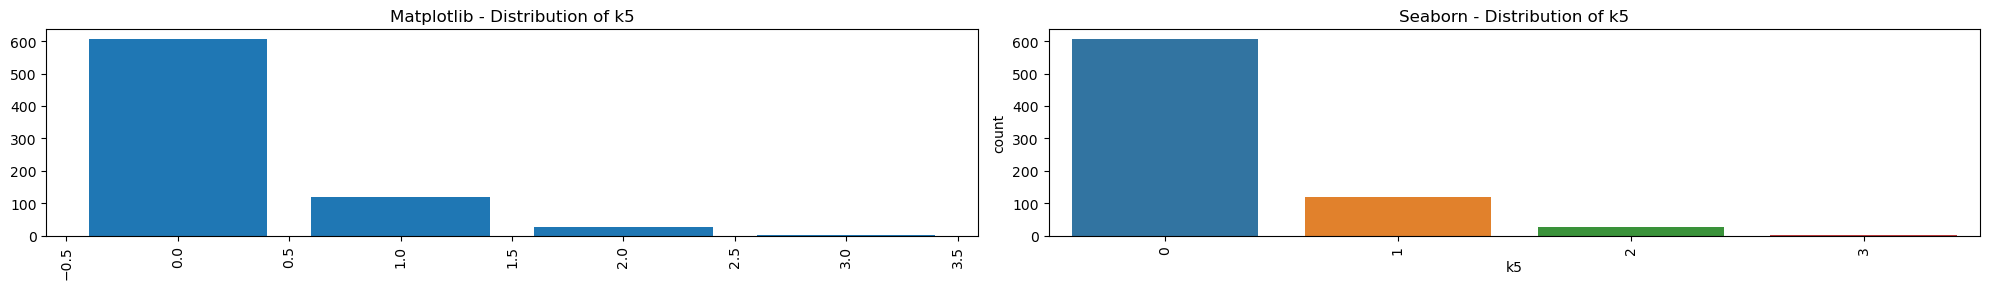

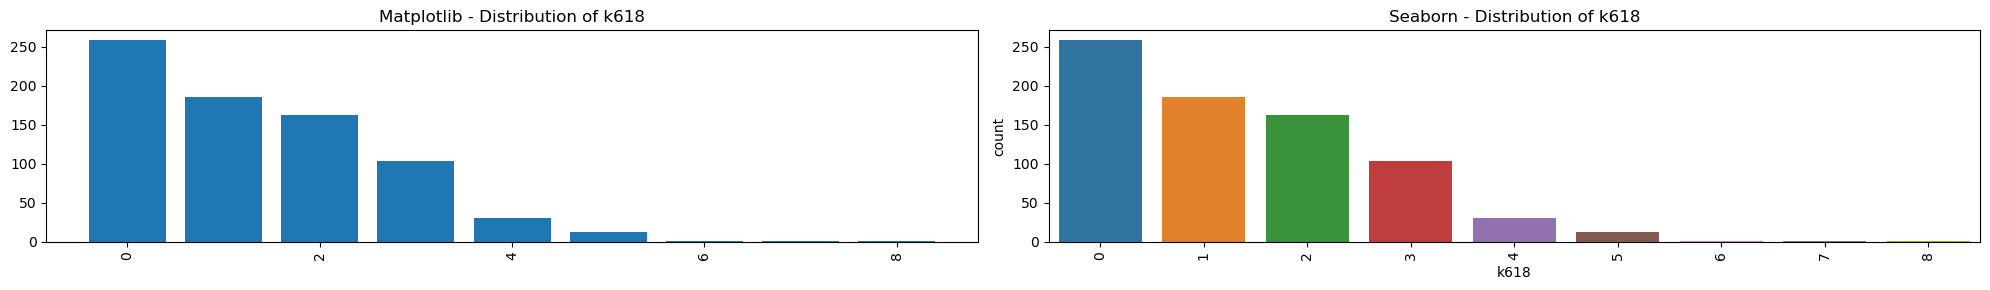

In [20]:
categorical_discrete_attributes = ['lfp_encoded', 'wc_encoded', 'hc_encoded', 'age', 'k5', 'k618']

for col in categorical_discrete_attributes:

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 3)) 

    axes[0].bar(df[col].value_counts().index, df[col].value_counts()) # Matplotlib,axes index is 0
    axes[0].set_title(f'Matplotlib - Distribution of {col}')
    axes[0].tick_params(axis='x', rotation=90)

    sns.countplot(data=df, x=col, ax=axes[1]) # Seaborn,axes index is 1 ,whichmeans it on the right 
    axes[1].set_title(f'Seaborn - Distribution of {col}')
    axes[1].tick_params(axis='x', rotation=90)   # rotation for better visial 

    plt.tight_layout()
    plt.show()



The bar charts above represent categorical and discrete variables. From these charts, we can discern that in the 'lfp' column, there are over 400 entries indicating 'yes'. In the 'wc' column, we observe around 200 'yes' entries. The 'hc' column reveals close to 300 'yes' responses. In terms of age distribution for the surveyed women, ages 36 and 48 have the most representation. nearly 600 respondents don't have children under 5 years. Furthermore, the distribution for 'k618' reveals that most families in the dataset have either 0 or 1 child aged between 6 to 18 years, and there's a significant decline in the count as the number of children within this age group increases.




### to answer the question,we need to starting correlation matrix

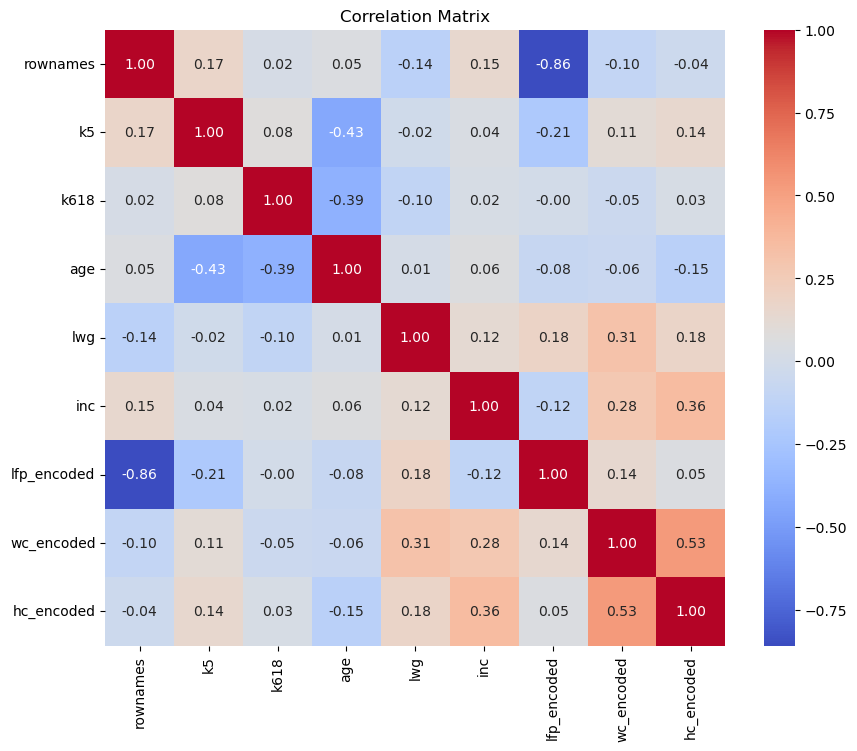

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")# generate heat map of correlation_matrix and correalation analysis
plt.title('Correlation Matrix')
plt.show()

### conclusion: 

Factors like the number of very young children (5 or below) have a negative influence on the labor-force participation (lfp) of married women, likely due to caring responsibilities. Expected wage rates positively influence participation, indicating that better-paying opportunities can motivate women to join the workforce. The educational background of the wife (and to a lesser extent, the husband) also positively influences labor-force participation. Lastly, higher family income, excluding the wife's income, might reduce the wife's necessity or motivation to participate in the workforce.

### cite: 
Fox, J. (2016). Applied Regression Analysis and Generalized Linear Models, Third Edition. Sage.
Fox, J. (2000). Multiple and Generalized Nonparametric Regression. Sage.
Fox, J. & Weisberg, S. (2019). An R Companion to Applied Regression, Third Edition. Sage.
Long, J. S. (1997). Regression Models for Categorical and Limited Dependent Variables. Sage.